In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Get The Data

In [2]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/omegaboost/Submission_Proyek_Analisa_Data_Dicoding/main/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/omegaboost/Submission_Proyek_Analisa_Data_Dicoding/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Get Information from Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Check for Missing Data

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Check for Duplication

In [8]:
print('Duplicate :',hour_df.duplicated().sum())

Duplicate : 0


In [9]:
print('Duplicate :',day_df.duplicated().sum())

Duplicate : 0


##### Get Data Descriptions

In [10]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [11]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Exploratory Data Analysis - Things To Be Answered

#### 1. How many bikes are rented per month?

In [12]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
hour_df['year_month']=hour_df['dteday'].dt.strftime('%Y-%m')
hour_df['day_name']=hour_df['dteday'].dt.strftime('%a')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month,day_name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01,Sat
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01,Sat
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01,Sat
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01,Sat
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01,Sat


In [14]:
hour_df.year_month.value_counts()

year_month
2012-08    744
2012-07    744
2011-05    744
2012-05    744
2011-07    744
2011-10    743
2012-03    743
2012-12    742
2011-12    741
2012-01    741
2011-08    731
2011-03    730
2011-06    720
2012-06    720
2012-09    720
2011-11    719
2011-04    719
2012-04    718
2012-11    718
2011-09    717
2012-10    708
2012-02    692
2011-01    688
2011-02    649
Name: count, dtype: int64

In [15]:
ref_season={1:'springer', 2:'summer', 3:'fall', 4:'winter'}
hour_df['season'].replace(ref_season,inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month,day_name
0,1,2011-01-01,springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01,Sat
1,2,2011-01-01,springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01,Sat
2,3,2011-01-01,springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01,Sat
3,4,2011-01-01,springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01,Sat
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01,Sat


In [16]:
ym_hour_df=hour_df[['instant','year_month','cnt']]
ym_hour_df.head()

,instant,year_month,cnt
0,1,2011-01,16
1,2,2011-01,40
2,3,2011-01,32
3,4,2011-01,13
4,5,2011-01,1


In [17]:
ym_hour_group=ym_hour_df.groupby(by='year_month').cnt.sum().reset_index()
ym_hour_group

,year_month,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


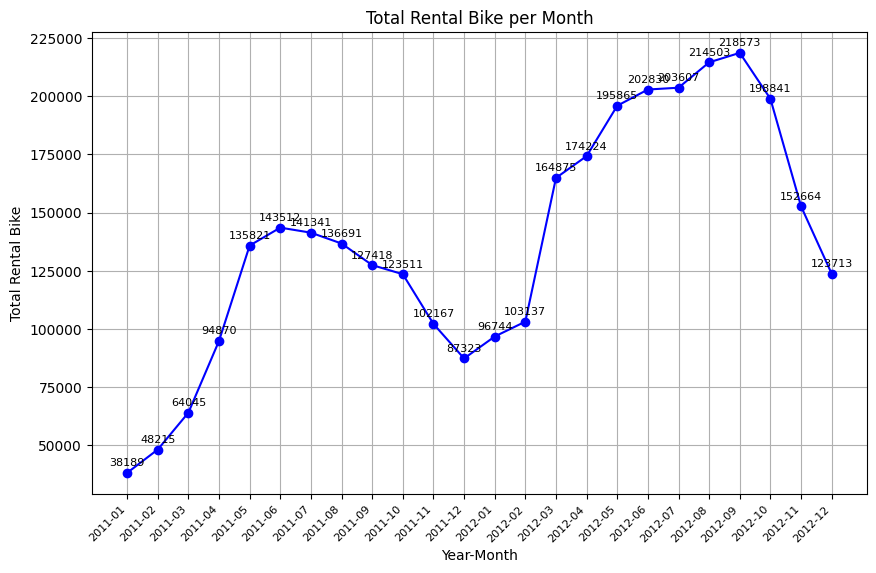

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ym_hour_group['year_month'], ym_hour_group['cnt'], marker='o', linestyle='-', color='b')

for i, txt in enumerate(ym_hour_group['cnt']):
    plt.annotate(txt, (ym_hour_group['year_month'][i], ym_hour_group['cnt'][i]), textcoords="offset points", xytext=(0, 5), fontsize=8, ha='center')

plt.title('Total Rental Bike per Month')
plt.xlabel('Year-Month')
plt.xticks(ym_hour_group['year_month'], fontsize=8, rotation=45, ha='right')
plt.ylabel('Total Rental Bike')
plt.grid(True)
plt.show()

In [19]:
day_hour_df=hour_df[['day_name','cnt']]
day_hour_df.head()

,day_name,cnt
0,Sat,16
1,Sat,40
2,Sat,32
3,Sat,13
4,Sat,1


In [20]:
cats = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_hour_df['day_name'] = pd.Categorical(day_hour_df['day_name'], categories=cats, ordered=True)

day_hour_grp=day_hour_df.groupby(by='day_name').sum()
day_hour_grp

C:\Users\edoha\AppData\Local\Temp\ipykernel_24312\2378355247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_hour_df['day_name'] = pd.Categorical(day_hour_df['day_name'], categories=cats, ordered=True)
C:\Users\edoha\AppData\Local\Temp\ipykernel_24312\2378355247.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_hour_grp=day_hour_df.groupby(by='day_name').sum()


,cnt
day_name,
Mon,455503
Tue,469109
Wed,473048
Thu,485395
Fri,487790
Sat,477807
Sun,444027


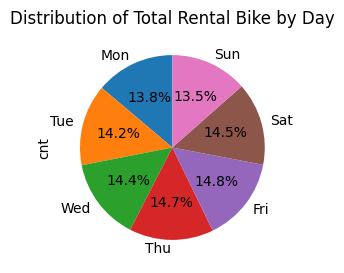

In [21]:
day_hour_grp.plot.pie(autopct='%1.1f%%', startangle=90, subplots=True, figsize=(8, 3), legend=False)
plt.title('Distribution of Total Rental Bike by Day')
plt.show()

In [22]:
season_hour_df=hour_df[['season','cnt']]
season_hour_df.head()

,season,cnt
0,springer,16
1,springer,40
2,springer,32
3,springer,13
4,springer,1


In [23]:
season_hour_df_group=season_hour_df.groupby('season').sum()
season_hour_df_group

,cnt
season,
fall,1061129
springer,471348
summer,918589
winter,841613


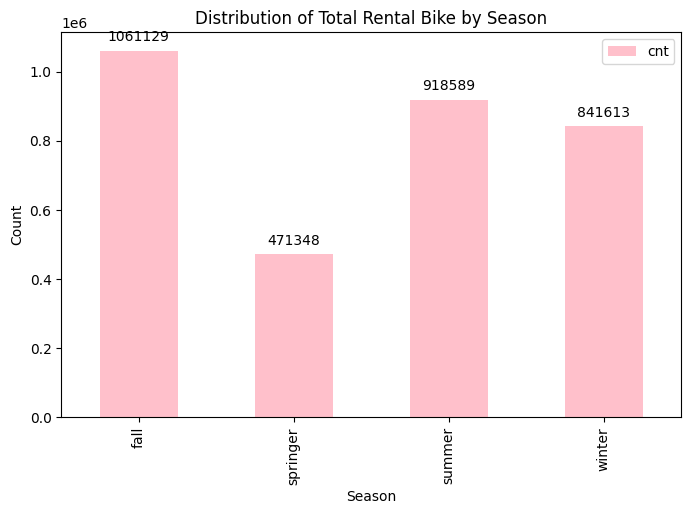

In [24]:

ax=season_hour_df_group.plot.bar(color='pink', figsize=(8, 5))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Total Rental Bike by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [25]:
nu_hour_df=hour_df[['dteday','year_month','day_name','season','casual','registered','cnt']]
nu_hour_df.head()

,dteday,year_month,day_name,season,casual,registered,cnt
0,2011-01-01,2011-01,Sat,springer,3,13,16
1,2011-01-01,2011-01,Sat,springer,8,32,40
2,2011-01-01,2011-01,Sat,springer,5,27,32
3,2011-01-01,2011-01,Sat,springer,3,10,13
4,2011-01-01,2011-01,Sat,springer,0,1,1


In [26]:
nu_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   year_month  17379 non-null  object        
 2   day_name    17379 non-null  object        
 3   season      17379 non-null  object        
 4   casual      17379 non-null  int64         
 5   registered  17379 non-null  int64         
 6   cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 950.5+ KB


In [27]:
nu_hour_df.to_csv("nu_hour_df.csv", index=False)